In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('clean_data.csv')

In [3]:
from datetime import datetime

df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Calculate age based on current date
current_date = datetime.now()
df['Age'] = (current_date - df['CustomerDOB']) // pd.Timedelta(days=365.25) 

C:\Users\008bh\AppData\Local\Temp\ipykernel_17196\2141675041.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [4]:
df1=df.sample(n=10000)

In [5]:
df2=df.sample(n=20000)

In [6]:
X=df1.iloc[:,[9,5]]


In [7]:
X=np.array(X)

In [8]:
from sklearn.cluster import KMeans
wcss=[]         #wcss- within cluster sum of squares...Lower WCSS indicates that the data points within each cluster are closer to their centroid, suggesting better-defined and more compact clusters.

In [9]:
for i in range(1,15):  #test for cluster numbers from 1 to 15
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++for smarter initialization of centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

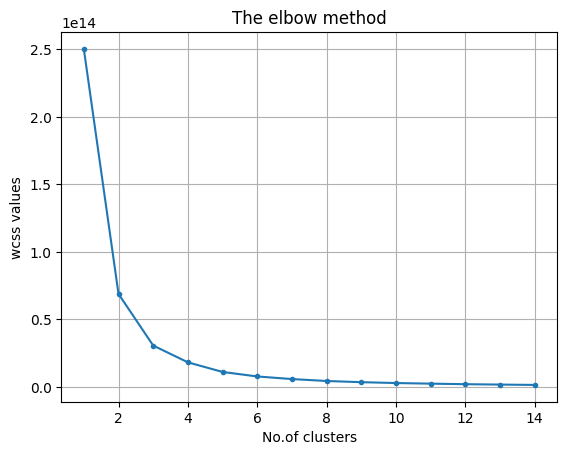

In [10]:
x=range(1,15)
y=wcss
x=np.array(x)
plt.plot(x,y,marker='.')

plt.grid(True)
plt.title("The elbow method")
plt.xlabel('No.of clusters')
plt.ylabel('wcss values')
plt.show()

In [11]:
#from the above plot it can be deduced that k=4


In [11]:
kmeansmodel =KMeans(n_clusters=4,init='k-means++',random_state=0)

In [12]:
y_kmeans=kmeansmodel.fit_predict(X)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
y_kmeans

array([2, 0, 0, ..., 0, 2, 0])

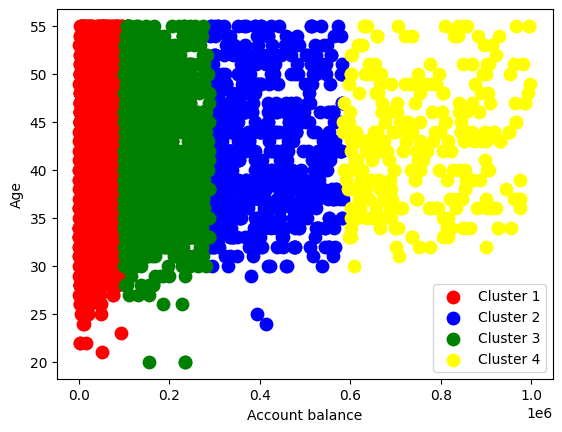

In [14]:
plt.scatter(X[y_kmeans ==0,1],X[y_kmeans == 0,0],s=80,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans ==1,1],X[y_kmeans ==1,0],s=80,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans ==2,1],X[y_kmeans ==2,0],s=80,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans ==3,1],X[y_kmeans ==3,0],s=80,c='yellow',label='Cluster 4')


plt.xlabel('Account balance')
plt.ylabel('Age')
plt.legend()
plt.show()

In [15]:
#We can clearly see that ages 20-25 rarely come in the cluster which shows that ages greater than 25 participate more in the clusters
#Bank mainly target the ones in blue cluster as we can see they belong to working class and there account balance is relatively high
#The variability of yellow is more compared to others

In [16]:
A=df1.iloc[:,[8,5]]

In [17]:
A=np.array(A)

In [18]:
from sklearn.cluster import KMeans
wcss=[]         #wcss-within cluster sum of squares...Lower WCSS indicates that the data points within each cluster are closer to their centroid, suggesting better-defined and more compact clusters.

In [19]:
for i in range(1,15):  #test for cluster numbers from 1 to 15
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++for smarter initialization of centroids
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

250755797365557.56
69208274577783.164
30957366672286.977
18536270686533.527
11383792297832.117
8072426065283.397
6110656119262.053


C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4686846725471.945
3801992578225.4746
3168860152186.3877


C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2718842201673.087
2352568877267.9297
2019355534553.96


C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1764226037171.3276


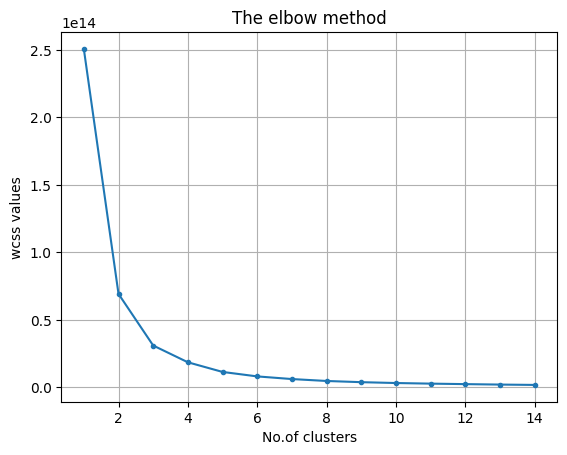

In [20]:
x=range(1,15)
y=wcss
x=np.array(x)
plt.plot(x,y,marker='.')

plt.grid(True)
plt.title("The elbow method")
plt.xlabel('No.of clusters')
plt.ylabel('wcss values')
plt.show()

In [21]:
kmeansmodel =KMeans(n_clusters=4,init='k-means++',random_state=0)

In [22]:
y_kmeans=kmeansmodel.fit_predict(A)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


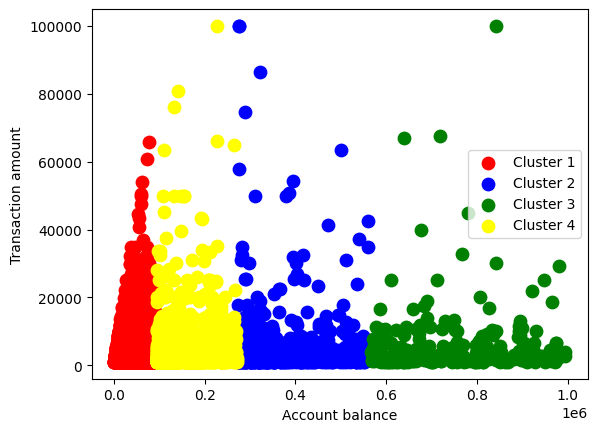

In [24]:
plt.scatter(A[y_kmeans ==0,1],A[y_kmeans == 0,0],s=80,c='red',label='Cluster 1')
plt.scatter(A[y_kmeans ==1,1],A[y_kmeans ==1,0],s=80,c='blue',label='Cluster 2')
plt.scatter(A[y_kmeans ==2,1],A[y_kmeans ==2,0],s=80,c='green',label='Cluster 3')
plt.scatter(A[y_kmeans ==3,1],A[y_kmeans ==3,0],s=80,c='yellow',label='Cluster 4')


plt.xlabel('Account balance')
plt.ylabel('Transaction amount')
plt.legend()
plt.show()

In [25]:
#Yellow cluster have very high account balance but there are barely any members from this cluster whose transaction amount 80,000 to 1lakh
#Red cluster never go above 60,000
#Most of transaction in 80,000 - 1 lakh range are in green cluster
#Target customer are in green and blue cluster as the transaction amount is the highest and account balance is relatively better

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 12161 to 187112
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            20000 non-null  object        
 1   CustomerID               20000 non-null  object        
 2   CustomerDOB              20000 non-null  datetime64[ns]
 3   CustGender               20000 non-null  object        
 4   CustLocation             19989 non-null  object        
 5   CustAccountBalance       20000 non-null  float64       
 6   TransactionDate          20000 non-null  object        
 7   TransactionTime          20000 non-null  float64       
 8   TransactionAmount (INR)  20000 non-null  float64       
 9   Age                      20000 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.7+ MB


In [27]:
arr=np.array(df['CustLocation'])

In [28]:
len(arr)

211506

In [29]:
from collections import Counter

In [30]:
counts=Counter(arr)

In [31]:
from sklearn.preprocessing import LabelEncoder


In [32]:
df3=df

df3

In [33]:
df3

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,02-08-2022,142.714,2060.0,50
1,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,02-08-2022,181.156,1762.5,35
2,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,02-08-2022,203.834,12300.0,45
3,T25,C1219943,1991-05-17,F,GURGAON,2951.10,03-08-2022,124.834,1892.0,32
4,T28,C2416848,1993-04-01,M,CHENNAI,20986.66,03-08-2022,160.544,2235.0,30
...,...,...,...,...,...,...,...,...,...,...
211501,T1048553,C5091732,1971-08-21,F,NEW DELHI,235620.05,18-09-2022,184.234,1058.0,52
211502,T1048556,C2122724,1978-03-20,M,FARIDABAD,436598.03,18-09-2022,185.337,5259.0,45
211503,T1048557,C3414578,1990-09-10,F,GURGAON,27592.70,18-09-2022,184.932,2000.0,33
211504,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18-09-2022,184.706,1000.0,45


In [34]:
df3 = df

In [35]:
df3

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,02-08-2022,142.714,2060.0,50
1,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,02-08-2022,181.156,1762.5,35
2,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,02-08-2022,203.834,12300.0,45
3,T25,C1219943,1991-05-17,F,GURGAON,2951.10,03-08-2022,124.834,1892.0,32
4,T28,C2416848,1993-04-01,M,CHENNAI,20986.66,03-08-2022,160.544,2235.0,30
...,...,...,...,...,...,...,...,...,...,...
211501,T1048553,C5091732,1971-08-21,F,NEW DELHI,235620.05,18-09-2022,184.234,1058.0,52
211502,T1048556,C2122724,1978-03-20,M,FARIDABAD,436598.03,18-09-2022,185.337,5259.0,45
211503,T1048557,C3414578,1990-09-10,F,GURGAON,27592.70,18-09-2022,184.932,2000.0,33
211504,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18-09-2022,184.706,1000.0,45


In [36]:
le = LabelEncoder()

In [37]:
df3['CustLocation'] = le.fit_transform(df3['CustLocation'])

In [38]:
df3

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T4,C5342380,1973-09-14,F,2739,866503.21,02-08-2022,142.714,2060.0,50
1,T5,C9031234,1988-03-24,F,2929,6714.43,02-08-2022,181.156,1762.5,35
2,T13,C6339347,1978-06-13,M,94,32274.78,02-08-2022,203.834,12300.0,45
3,T25,C1219943,1991-05-17,F,1619,2951.10,03-08-2022,124.834,1892.0,32
4,T28,C2416848,1993-04-01,M,826,20986.66,03-08-2022,160.544,2235.0,30
...,...,...,...,...,...,...,...,...,...,...
211501,T1048553,C5091732,1971-08-21,F,2985,235620.05,18-09-2022,184.234,1058.0,52
211502,T1048556,C2122724,1978-03-20,M,1397,436598.03,18-09-2022,185.337,5259.0,45
211503,T1048557,C3414578,1990-09-10,F,1619,27592.70,18-09-2022,184.932,2000.0,33
211504,T1048566,C6420483,1978-08-30,M,4601,10117.87,18-09-2022,184.706,1000.0,45


In [39]:
B=df3.iloc[:,[4,5]]

In [40]:
B=np.array(B)

In [41]:
from sklearn.cluster import KMeans
wcss=[]

In [42]:
for i in range(1,15):  #test for cluster numbers from 1 to 15
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++for smarter initialization of centroids
    kmeans.fit(B)
    wcss.append(kmeans.inertia_)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

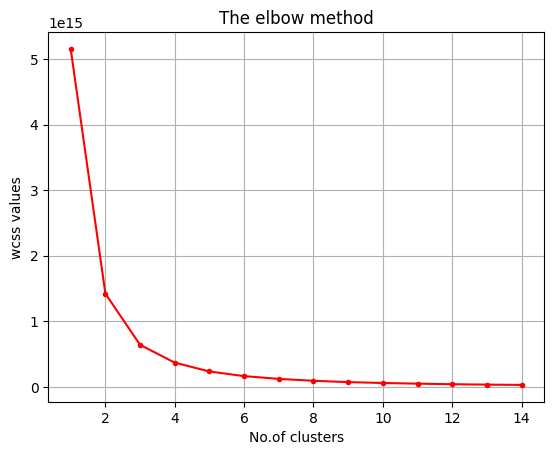

In [43]:
x=range(1,15)
y=wcss
x=np.array(x)
plt.plot(x,y,marker='.',c='red')

plt.grid(True)
plt.title("The elbow method")
plt.xlabel('No.of clusters')
plt.ylabel('wcss values')
plt.show()

In [44]:
kmeansmodel =KMeans(n_clusters=4,init='k-means++',random_state=0)

In [45]:
y_kmeans=kmeansmodel.fit_predict(B)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


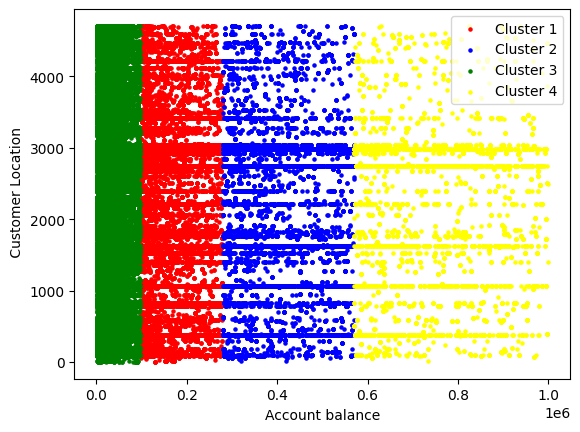

In [46]:
plt.scatter(B[y_kmeans ==0,1],B[y_kmeans == 0,0],s=5,c='red',label='Cluster 1')
plt.scatter(B[y_kmeans ==1,1],B[y_kmeans ==1,0],s=5,c='blue',label='Cluster 2')
plt.scatter(B[y_kmeans ==2,1],B[y_kmeans ==2,0],s=5,c='green',label='Cluster 3')
plt.scatter(B[y_kmeans ==3,1],B[y_kmeans ==3,0],s=5,c='yellow',label='Cluster 4')


plt.xlabel('Account balance')
plt.ylabel(' Customer Location')
plt.legend()
plt.show()


In [47]:
#Yellow cluster have very high account balance but there are barely any members from this cluster whose transaction amount 80,000 to 1lakh
#Red cluster never go above 60,000
#Most of transaction in 80,000 - 1 lakh range are in green cluster
#Target customer are in green and blue cluster as the transaction amount is the highest and account balance is relatively better

In [48]:
df3

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T4,C5342380,1973-09-14,F,2739,866503.21,02-08-2022,142.714,2060.0,50
1,T5,C9031234,1988-03-24,F,2929,6714.43,02-08-2022,181.156,1762.5,35
2,T13,C6339347,1978-06-13,M,94,32274.78,02-08-2022,203.834,12300.0,45
3,T25,C1219943,1991-05-17,F,1619,2951.10,03-08-2022,124.834,1892.0,32
4,T28,C2416848,1993-04-01,M,826,20986.66,03-08-2022,160.544,2235.0,30
...,...,...,...,...,...,...,...,...,...,...
211501,T1048553,C5091732,1971-08-21,F,2985,235620.05,18-09-2022,184.234,1058.0,52
211502,T1048556,C2122724,1978-03-20,M,1397,436598.03,18-09-2022,185.337,5259.0,45
211503,T1048557,C3414578,1990-09-10,F,1619,27592.70,18-09-2022,184.932,2000.0,33
211504,T1048566,C6420483,1978-08-30,M,4601,10117.87,18-09-2022,184.706,1000.0,45


In [49]:
C=df3.iloc[:,[8,3]]

In [50]:
C=np.array(C)

In [51]:
df4=df3.sample(n=50000)

In [52]:
C=df4.iloc[:,[8,4]]

In [53]:
C=np.array(C)

In [54]:
wcss=[]


In [55]:
for i in range(1,15):  #test for cluster numbers from 1 to 15
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++for smarter initialization of centroids
    kmeans.fit(C)
    wcss.append(kmeans.inertia_)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

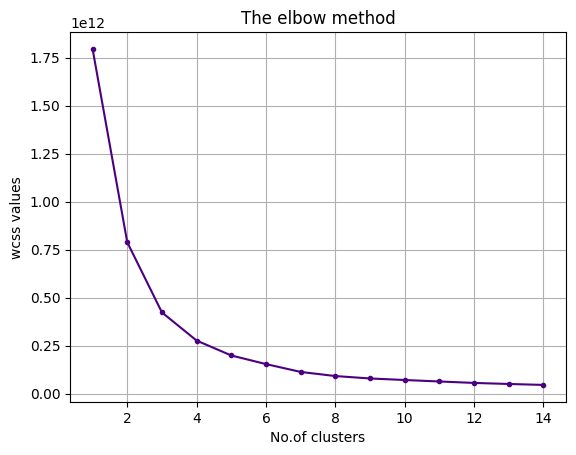

In [56]:
x=range(1,15)
y=wcss
x=np.array(x)
plt.plot(x,y,marker='.',c='indigo')

plt.grid(True)
plt.title("The elbow method")
plt.xlabel('No.of clusters')
plt.ylabel('wcss values')
plt.show()

In [57]:
kmeansmodel =KMeans(n_clusters=6,init='k-means++',random_state=0)

In [58]:
y_kmeans=kmeansmodel.fit_predict(C)

C:\Users\008bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


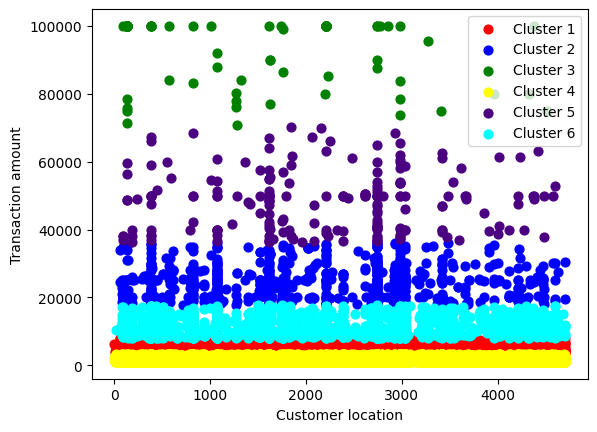

In [59]:
plt.scatter(C[y_kmeans ==0,1],C[y_kmeans == 0,0],s=40,c='red',label='Cluster 1')
plt.scatter(C[y_kmeans ==1,1],C[y_kmeans ==1,0],s=40,c='blue',label='Cluster 2')
plt.scatter(C[y_kmeans ==2,1],C[y_kmeans ==2,0],s=40,c='green',label='Cluster 3')
plt.scatter(C[y_kmeans ==3,1],C[y_kmeans ==3,0],s=40,c='yellow',label='Cluster 4')
plt.scatter(C[y_kmeans ==4,1],C[y_kmeans ==4,0],s=40,c='indigo',label='Cluster 5')
plt.scatter(C[y_kmeans ==5,1],C[y_kmeans ==5,0],s=40,c='cyan',label='Cluster 6')

plt.legend()

plt.xlabel('Customer location')
plt.ylabel('Transaction amount')
plt.show()

In [60]:
#It is to build ATMs 
#We can see the locations where transaction amount is high and specifically target them
#In the yellow regio not all location are present, so we can use a different strategy to locate them
#So one prefers locations in yellow belt where transaction is high because those locations can be trusted ( enhancing safety measure in those branches)

In [61]:
import joblib

In [62]:
joblib.dump(kmeans,"customer_segmentation")

['customer_segmentation']

In [63]:
model=joblib.load("customer_segmentation")

In [64]:
model.predict([[9,5]])

array([4])

In [65]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    p1 = int(e1.get())
    p2 = int(e2.get())
    model = joblib.load("customer_segmentation")
    result = model.predict([[p1, p2]])
    print("This customer belongs to cluster no:", result[0])

    cluster_label = f"Cluster {result[0] + 1}"  # Adding 1 to match the cluster numbering
    label_result.config(text=cluster_label)

master = Tk()
master.title("Customer segmentation using machine learning")
label = Label(master, text="Customer segmentation using machine learning", bg="black", fg="white")
label.grid(row=0, columnspan=2)
Label(master, text="Age").grid(row=1)
Label(master, text="Account balance").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
Button(master, text="Predict", command=show_entry).grid(row=3, columnspan=2)

# Label to display the predicted cluster
label_result = Label(master, text="")
label_result.grid(row=4, columnspan=2)

mainloop()


This customer belongs to cluster no: 0
This customer belongs to cluster no: 0
This customer belongs to cluster no: 0
This customer belongs to cluster no: 0
